# Flamespeed 

#### Bernard Kleynhans, Tim Lee, Yaniv Toledano (Group 14)


***

# 1. Installation

**Flamespeed can easily be installed using PyPI**

```bash
pip install flamespeed
```

# 2. Getting started

### Import package

In [1]:
# import os
# import sys
# module_path = os.path.abspath(os.path.join('..'))
# if module_path not in sys.path:
#     sys.path.append(module_path)

In [2]:
from IPython.display import Image

In [3]:
from flamespeed import chemkin

### Instantiate class and import reaction data

In [4]:
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_base.xml')
print(fs)

Number_of_reactions:3                     
Number_of_species:6                     
Number_of_reversible_reactions:0                     
Reversible:No                     
Reaction_type:Elementary                     
Species_list:['H', 'O', 'OH', 'H2', 'H2O', 'O2']



### Calculate reaction rate for system of elementary, irreversible reactions

In [5]:
# Specie concentrations
conc = [0.5, 1, 2, 2, 0, 1]

# Set temperature
fs.set_temp(750)

# Reaction rate
rate = fs.get_reaction_rate(conc)
print("Reaction rates:")
[s + ': {0:1.4E}'.format(r) for s, r in zip(fs.species_list, rate)]

Reaction rates:


['H: -9.7109E+04',
 'O: 1.0111E+05',
 'OH: 2.6978E+05',
 'H2: -9.0335E+04',
 'H2O: 4.0000E+03',
 'O2: -1.8744E+05']

### Mix it up with some reversible reactions

In [6]:
# Instantiate class
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_mixed.xml')
print(fs)

Number_of_reactions:11                     
Number_of_species:8                     
Number_of_reversible_reactions:2                     
Reversible:Some                     
Reaction_type:Elementary                     
Species_list:['H', 'O', 'OH', 'H2', 'H2O', 'O2', 'HO2', 'H2O2']



In [7]:
# Specie concentrations
conc = [0.5, 1, 1, 2, 0, 1, 1, 2]

# Set temperature
fs.set_temp(250)

# Reaction rate
rate = fs.get_reaction_rate(conc)
print("Reaction rates:")
[s + ': {0:1.4E}'.format(r) for s, r in zip(fs.species_list, rate)]

Reaction rates:


['H: -4.0624E+13',
 'O: -3.2625E+13',
 'OH: 6.0693E+13',
 'H2: 6.2793E+12',
 'H2O: 4.0622E+13',
 'O2: 7.4728E+13',
 'HO2: -1.0428E+14',
 'H2O2: -4.7978E+12']

### And some other species

In [8]:
# Instantiate class
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_species.xml')
print(fs)

Number_of_reactions:2                     
Number_of_species:5                     
Number_of_reversible_reactions:0                     
Reversible:No                     
Reaction_type:Elementary                     
Species_list:['N', 'N2', 'H', 'NH', 'NH2']



In [9]:
# Specie concentrations
conc = [0.5, 1, 1, 2, 0]

# Set temperature
fs.set_temp(750)

# Reaction rate
rate = fs.get_reaction_rate(conc)
print("Reaction rates:")
[s + ': {0:1.4E}'.format(r) for s, r in zip(fs.species_list, rate)]

Reaction rates:


['N: -3.8568E+05',
 'N2: 3.7489E+05',
 'H: 3.5330E+05',
 'NH: -3.7489E+05',
 'NH2: 1.0792E+04']

# 3. New features

## Validate conservation of mass

In [10]:
# Instantiate class and read data
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_base_conservation.xml')
print(fs)

Number_of_reactions:3                     
Number_of_species:6                     
Number_of_reversible_reactions:0                     
Reversible:No                     
Reaction_type:Elementary                     
Species_list:['H', 'O', 'OH', 'H2', 'H2O', 'O2']



## Check that species are valid

In [11]:
# Instantiate class and read data
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_base_specie_db.xml')
print(fs)

ValueError: No data exists in the thermo database for the following species: {'OZ', 'Z'}

In [12]:
# Instantiate class and read data
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_base_specie_db.xml', check_mass=False)
print(fs)

Number_of_reactions:3                     
Number_of_species:8                     
Number_of_reversible_reactions:0                     
Reversible:No                     
Reaction_type:Elementary                     
Species_list:['Z', 'OZ', 'H', 'O', 'OH', 'H2', 'H2O', 'O2']



### Check self-consistency of XML file

#### Example 1

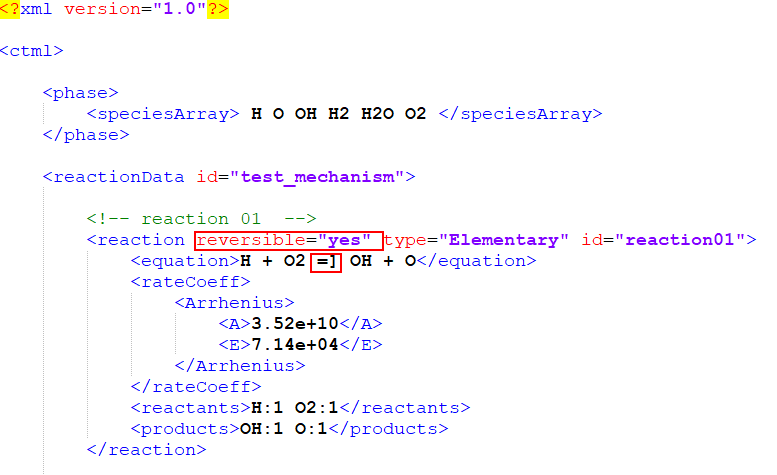

In [13]:
Image('images/consistency1.png')

In [14]:
# Instantiate class and read data
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_base_consistency_1.xml', check_mass=False, verify_integrity=True)
print(fs)

ValueError: Reversible tag inconsistent with reaction equation for reaction id: 1

In [15]:
# Instantiate class and read data
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_base_consistency_1.xml', check_mass=False, verify_integrity=False)
print(fs)

Number_of_reactions:3                     
Number_of_species:6                     
Number_of_reversible_reactions:1                     
Reversible:Some                     
Reaction_type:Elementary                     
Species_list:['H', 'O', 'OH', 'H2', 'H2O', 'O2']



#### Example 2

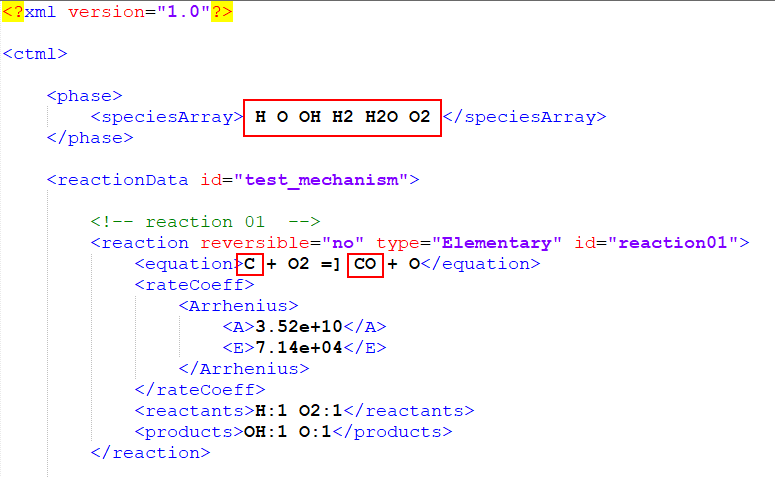

In [16]:
Image('images/consistency2.png')

In [17]:
# Instantiate class and read data
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_base_consistency_2.xml', check_mass=False)
print(fs)

ValueError: Specie 'C' listed in reaction equation, not included in species phase array.

#### Example 3

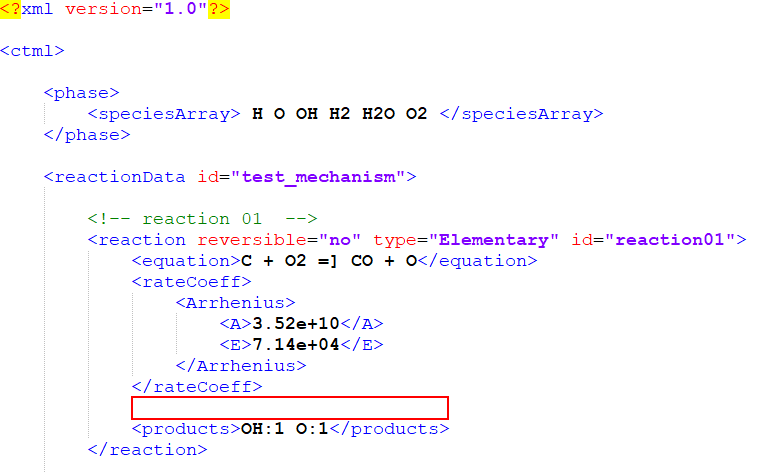

In [18]:
Image('images/consistency3.png')

In [19]:
# Instantiate class and read data
fs = chemkin.ReactionRate()
fs.read_XML('files/rxns_base_consistency_3.xml', check_mass=False)
print(fs)

ValueError: Missing data in input file.